# EDA with prompt QWen 2.5-Max

 Develop a Python program that performs the following exploratory data analysis (EDA) tasks on a CSV file provided by user german_credit_data.csv:
Reading CSV file: Load the CSV file into a DataFrame using the pandas library.
Initial display: Displays the first 5 rows of the dataset.
Dataset overview: Provides an informative summary of the dataset, including the number of rows and columns, the data types of each column, and the number of non-null values.
Statistical description: Generates a statistical summary of the dataset, including metrics such as mean, median, standard deviation, minimum, maximum, and quartiles for numeric columns.
Correlation matrix: Calculates the correlation matrix for numeric variables in the dataset.
Heatmap: Visualize the correlation matrix using a heatmap with the seaborn or matplotlib library, making sure that the correlation values ​​are readable and the plot is well labeled.
The program should be modular, easy to understand, and well-commented. It should also include error handling for cases such as a missing CSV file, non-numeric columns in the correlation matrix, or formatting issues in the file.

CSV file successfully loaded.

First 5 rows of the dataset:
   Unnamed: 0  age     sex  job housing saving_accounts checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   credit amount  duration              purpose  risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  

Dataset Overview:
Number of rows: 1000
Number of columns: 11

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10

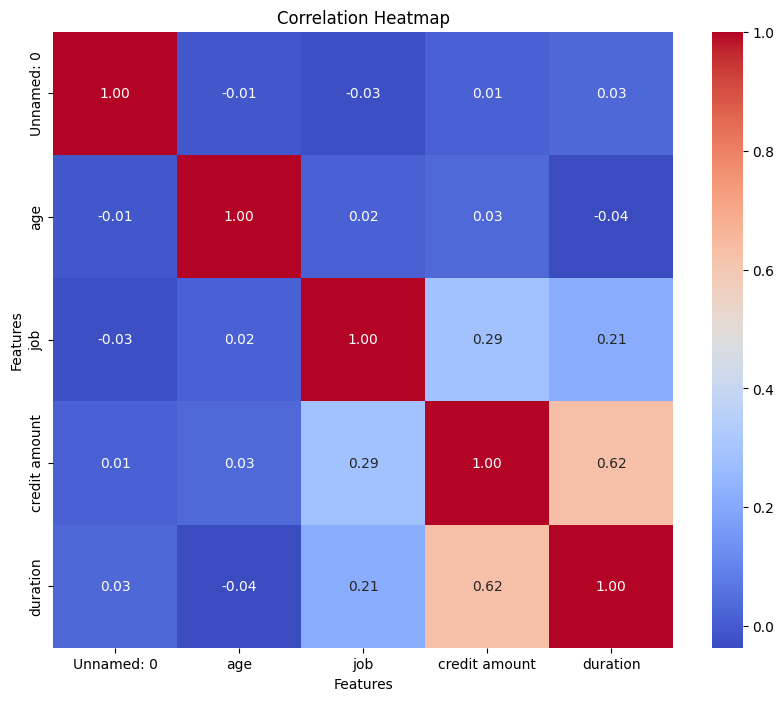

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_csv(file_path):
    """
    Load a CSV file into a pandas DataFrame.

    Parameters:
        file_path (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    try:
        df = pd.read_csv(file_path)
        print("CSV file successfully loaded.")
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please check the file path.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The file is empty or contains no data.")
        return None
    except pd.errors.ParserError:
        print("Error: The file could not be parsed. Check the file format.")
        return None

def display_initial_rows(df):
    """
    Display the first 5 rows of the dataset.

    Parameters:
        df (pd.DataFrame): The DataFrame to display.
    """
    if df is not None:
        print("\nFirst 5 rows of the dataset:")
        print(df.head())

def dataset_overview(df):
    """
    Provide an informative summary of the dataset.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
    """
    if df is not None:
        print("\nDataset Overview:")
        print(f"Number of rows: {df.shape[0]}")
        print(f"Number of columns: {df.shape[1]}")
        print("\nData types and non-null counts:")
        print(df.info())
        print("\nSummary statistics for numeric columns:")
        print(df.describe(include='all'))

def calculate_correlation_matrix(df):
    """
    Calculate the correlation matrix for numeric columns in the dataset.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        pd.DataFrame: Correlation matrix.
    """
    if df is not None:
        numeric_cols = df.select_dtypes(include=['float64', 'int64'])
        if numeric_cols.empty:
            print("No numeric columns found for correlation calculation.")
            return None
        corr_matrix = numeric_cols.corr()
        print("\nCorrelation Matrix:")
        print(corr_matrix)
        return corr_matrix
    return None

def plot_heatmap(corr_matrix):
    """
    Visualize the correlation matrix using a heatmap.

    Parameters:
        corr_matrix (pd.DataFrame): The correlation matrix to visualize.
    """
    if corr_matrix is not None:
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
        plt.title("Correlation Heatmap")
        plt.xlabel("Features")
        plt.ylabel("Features")
        plt.show()

def main():
    """
    Main function to perform EDA on the provided CSV file.
    """
    # Prompt user for the file path
    file_path = "german_credit_data.csv"

    # Step 1: Load the CSV file
    df = load_csv(file_path)
    if df is None:
        return

    # Step 2: Display the first 5 rows
    display_initial_rows(df)

    # Step 3: Provide an overview of the dataset
    dataset_overview(df)

    # Step 4: Calculate the correlation matrix
    corr_matrix = calculate_correlation_matrix(df)

    # Step 5: Plot the heatmap
    plot_heatmap(corr_matrix)

if __name__ == "__main__":
    main()